In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
# reading data
df = pd.read_csv("health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Exploration

In [190]:
# Perform descriptive analysis
print("Total data rows", df.shape[0])
for i in df.columns[:-1]:
    zero_count = df[df[i]==0].shape[0]
    print("missing value percenatge in %s is %.0f" % (i, zero_count/df.shape[0]*100), '%')

Total data rows 768
missing value percenatge in Pregnancies is 14 %
missing value percenatge in Glucose is 1 %
missing value percenatge in BloodPressure is 5 %
missing value percenatge in SkinThickness is 30 %
missing value percenatge in Insulin is 49 %
missing value percenatge in BMI is 1 %
missing value percenatge in DiabetesPedigreeFunction is 0 %
missing value percenatge in Age is 0 %


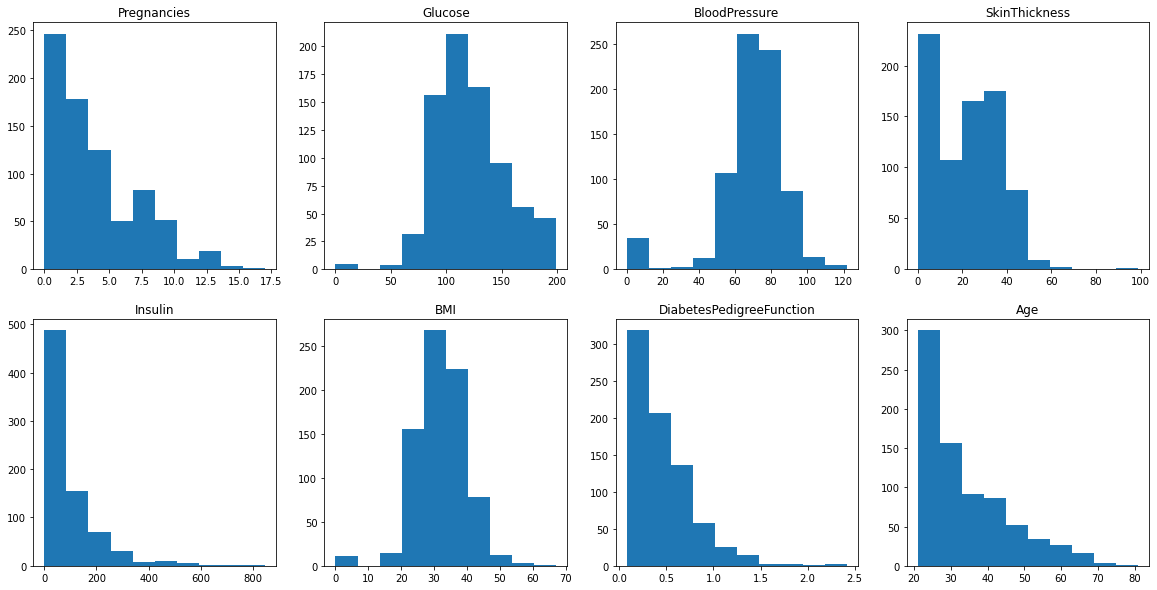

In [191]:
# Visually explore these variables using histograms
fig, ax = plt.subplots(2,4, figsize=(20,10))
axs = ax.ravel()

for idx,col in enumerate(df.columns[:-1]):
    axs[idx].hist(df[col].to_numpy())
    axs[idx].set_title(col)
    
plt.show()

In [192]:
# Treat the missing values accordingly
df_cleaned = df.copy()
for i in range(df.shape[0]):
    if 0 in df.iloc[i,:-1].values:
        df_cleaned.drop(i, inplace=True)
        
print("percetange of rows dropped for missing values", int((df.shape[0]-df_cleaned.shape[0])/df.shape[0]*100),"%")

percetange of rows dropped for missing values 56 %


In [193]:
# target variable count
df_cleaned.iloc[:,-1].value_counts()

0    225
1    111
Name: Outcome, dtype: int64

In [194]:
# Removing missing values
df = df_cleaned

In [195]:
df.shape

(336, 9)

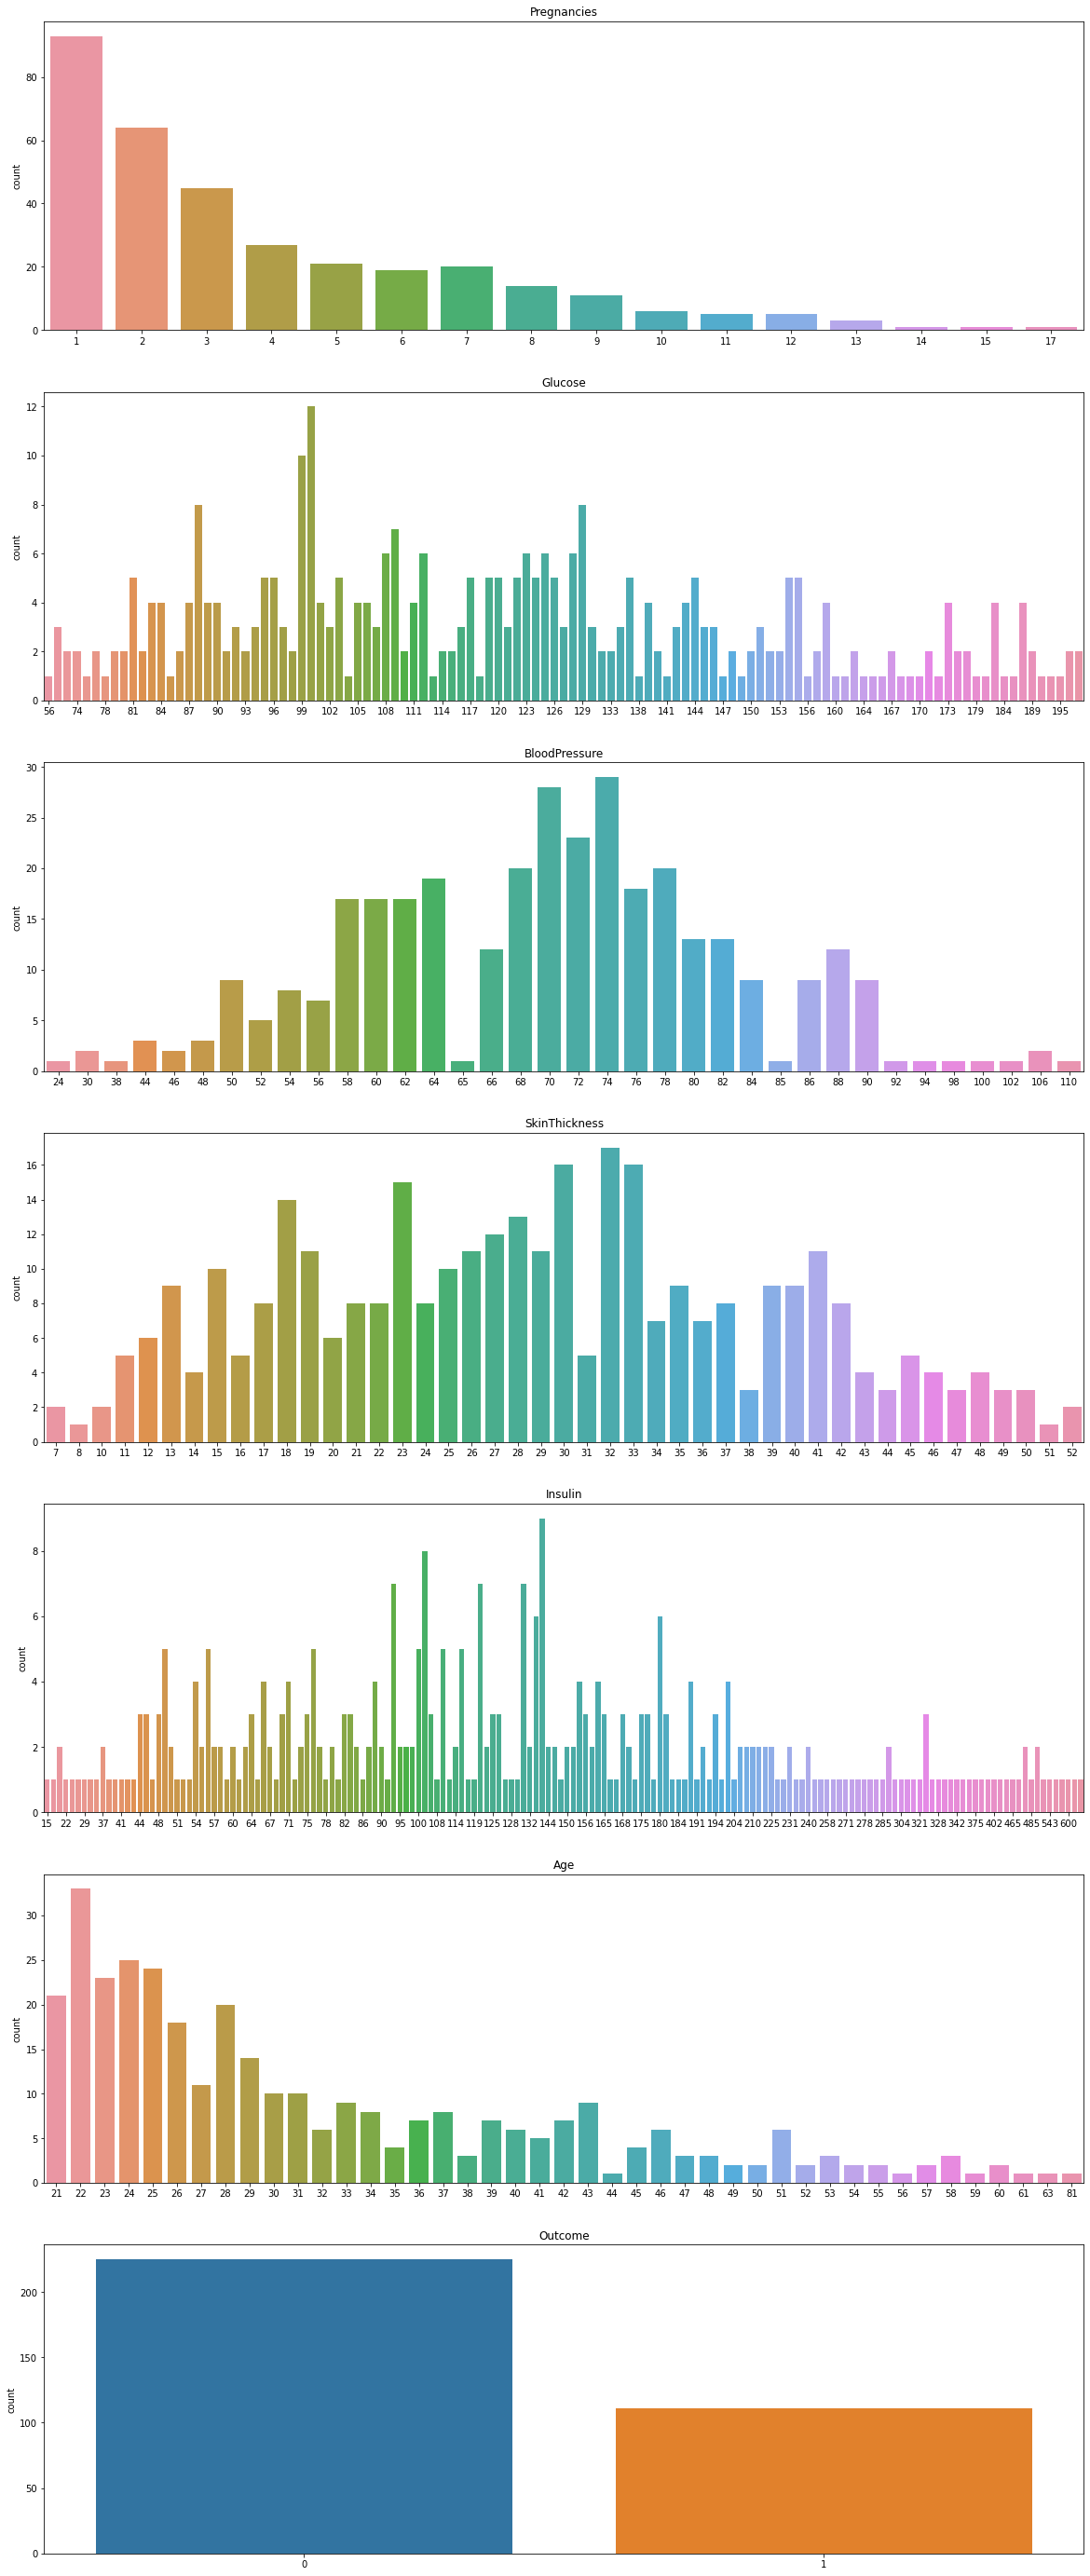

In [197]:
# Create a count (frequency) plot describing the data types and the count of variables
fig, ax = plt.subplots(7,1, figsize=(20,50))
axs = ax.ravel()

idx = 0
for col in df.columns:
    if df[col].dtype == 'int64':
        g = sns.countplot(x = col, data = df, ax = axs[idx])
        if len(df[col].unique())>60:
            g.set(xticks=([x for x in range(len(df[col].unique())) if x%3==0]))
        g.set(title=col)
        g.set(xlabel=None)
        idx = idx+1
    
plt.show()

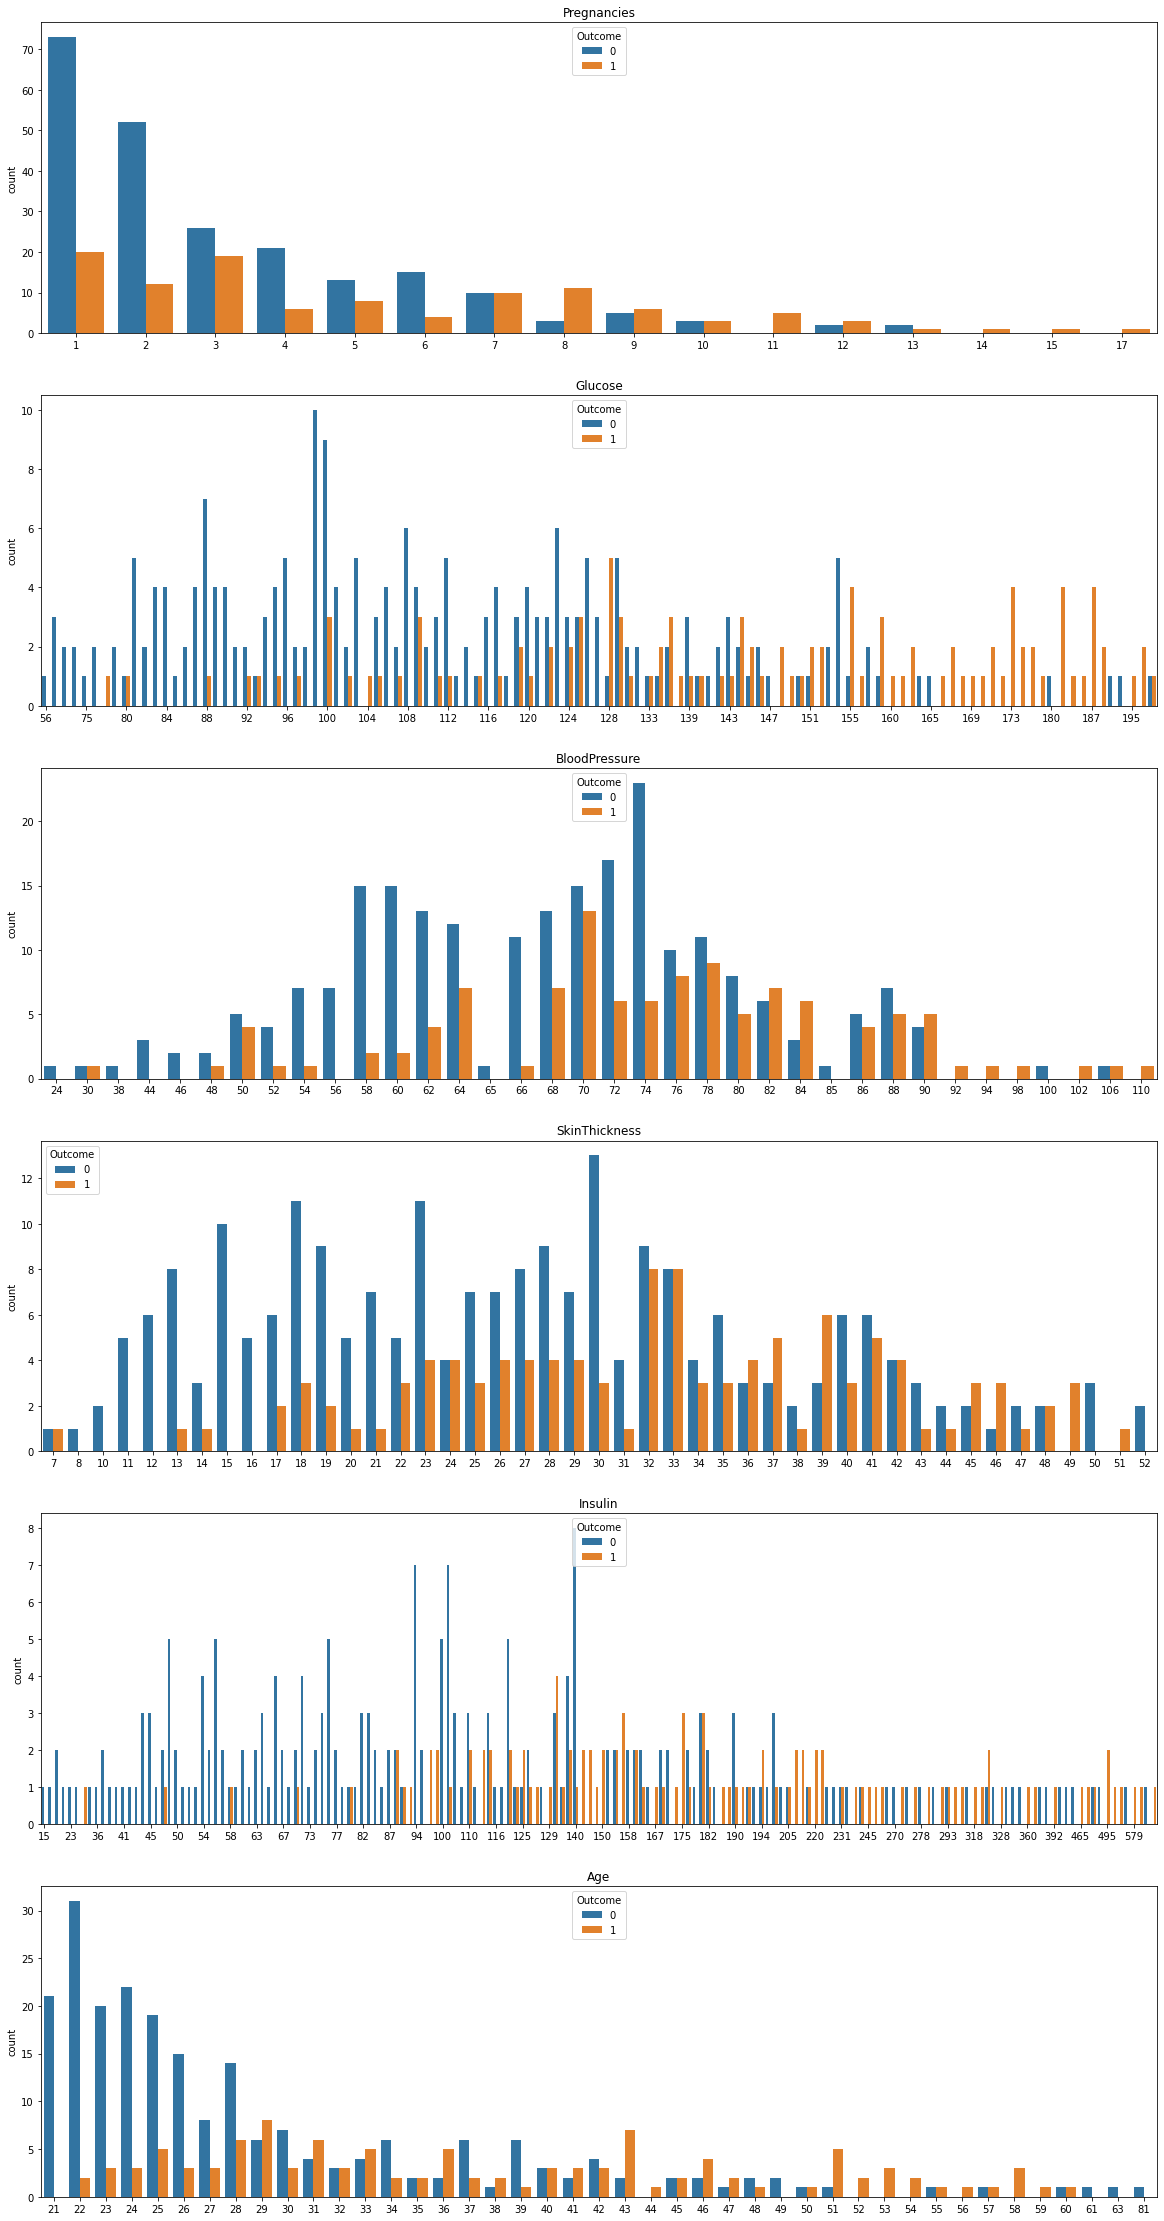

In [198]:
# Check the balance of the data by plotting the count of outcomes by their value
fig, ax = plt.subplots(6,1, figsize=(20,40))
axs = ax.ravel()

idx = 0
for col in df.columns[:-1]:
    if df[col].dtype == 'int64':
        g = sns.countplot(x = col, data = df, ax = axs[idx], hue=df.iloc[:,-1])
        if len(df[col].unique())>60:
            g.set(xticks=([x for x in range(len(df[col].unique())) if x%4==0]))
        g.set(title=col)
        g.set(xlabel=None)
        idx = idx+1
    
plt.show()

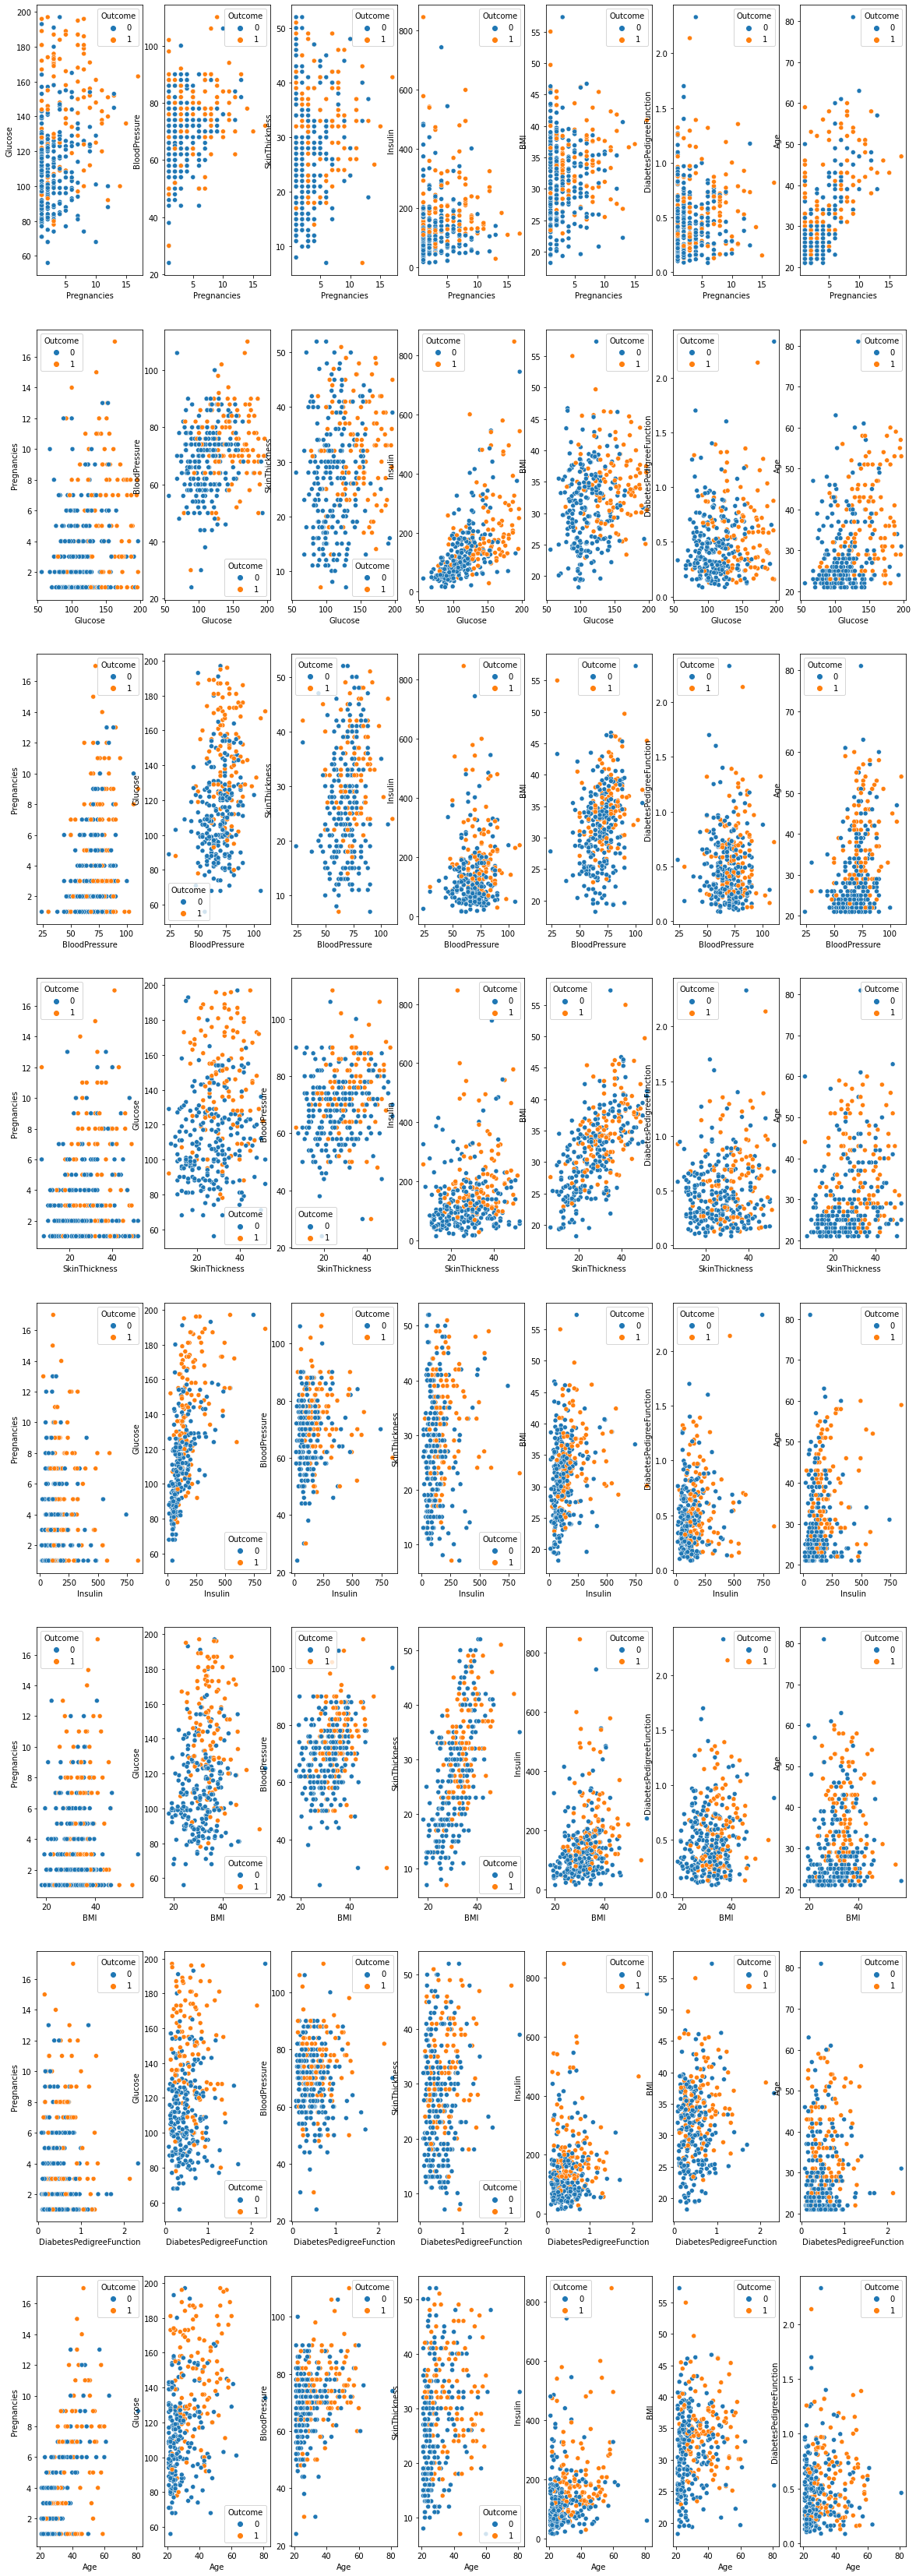

In [199]:
# Create scatter charts between the pair of variables to understand the relationships
fig, ax = plt.subplots(8,7, figsize=(20,60))
axs = ax.ravel()

idx = 0
for col1 in df.columns[:-1]:
    for col2 in df.columns[:-1]:
        if col1!=col2:
            g = sns.scatterplot(x = col1, y = col2, data = df, ax = axs[idx], hue=df.iloc[:,-1])
            idx = idx+1
    
plt.show()

<AxesSubplot:>

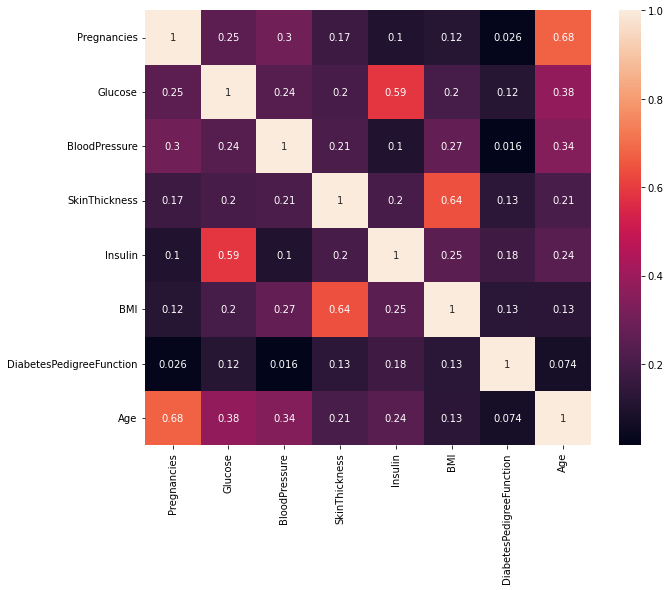

In [200]:
# Perform correlation analysis. Visually explore it using a heat map
plt.subplots(figsize=(10,8))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True)

## Data Modeling

In [201]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3)

In [202]:
# Apply an appropriate classification algorithm to build a model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model = RandomForestClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [203]:
# evaluating model score
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8680851063829788
0.7425742574257426


In [204]:
# Compare model with the results from KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5, p = 2)
model_knn.fit(X_train,y_train)

# evaluating model score
print(model_knn.score(X_train,y_train))
print(model_knn.score(X_test,y_test))

0.825531914893617
0.7029702970297029


In [205]:
# Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve)

from sklearn.metrics import classification_report

target_names = ['No diabetes', 'Have diabetes']
print(classification_report(y_test, model.predict(X_test), target_names=target_names, labels=[0,1]))

               precision    recall  f1-score   support

  No diabetes       0.74      0.90      0.81        62
Have diabetes       0.76      0.49      0.59        39

     accuracy                           0.74       101
    macro avg       0.75      0.70      0.70       101
 weighted avg       0.75      0.74      0.73       101



No Skill: ROC AUC=0.500
Random Forrest: ROC AUC=0.873
KNN: ROC AUC=0.756


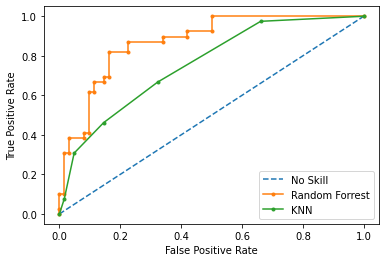

In [206]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for random forrest model
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forrest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# predict probabilities for KNN model
lr_probs_knn = model_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs_knn = lr_probs_knn[:, 1]
# calculate scores
lr_auc_knn = roc_auc_score(y_test, lr_probs_knn)
# summarize scores
print('KNN: ROC AUC=%.3f' % (lr_auc_knn))
# calculate roc curves
lr_fpr_knn, lr_tpr_knn, _ = roc_curve(y_test, lr_probs_knn)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forrest')
plt.plot(lr_fpr_knn, lr_tpr_knn, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()